## 1. 서울시 구별 CCTV현황분석  (06.08.월)
      - http://opengov.seoul.go.kr
      - http://stat.seoul.go.kr

In [96]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)


mpl.rcParams['axes.unicode_minus']=False


### 1) 데이터수집
       - 수집한 경로를 써주면 된다.

In [6]:
## CCTV자료 불러오기!
cctv_seoul=pd.read_csv('C:\\Users\\acorn\\mywork\\pythonwork\\analysis\\data\\seoul\\cctv.csv')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [75]:
## 인구자료 불러오기!
pop_seoul=pd.read_excel('C:\\Users\\acorn\\mywork\\pythonwork\\analysis\\data\\seoul\\report.xls',
                       usecols='B,D,G,J,N',      # usecols='B,D,G,J,N' 엑셀 파일의 B,D,G,J,N열만 가져온다.
                       header=2)                 # 2번쩨 헹을 제목으로 지정하겠다.
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### 2) 전처리

In [76]:
## CCTV컬럼이름변경
# CCTV에서 기관명이라는 컬럼명을 '구별'로 변경
cctv_seoul.rename(columns={'기관명':'구별'},inplace=True)  # inplace=True 변경사항이 자동으로 변수에 저장!
#cctv_seoul.renmae(columns={cctv_seoul.columns[0]:'구별'})


## 인구수 컬럼 이름변경
col={'자치구':'구별','계':'인구수','계.1':'한국인','계.2':'외국인','65세이상고령자':'고령자'}
pop_seoul.rename(columns={'자치구':'구별','계':'인구수','계.1':'한국인','계.2':'외국인','65세이상고령자':'고령자'},inplace=True)
pop_seoul.head()


,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### 3) 탐색적 데이터 분석

In [ ]:
## 어느 구가 가장 cctv가 많이 설치되어 있는가? (가장 적게 설치된 곳은 어디인가?)
# cctv 데이터에서 소계를 기준을 정렬 (5개 구 확인)
print(cctv_seoul.sort_values(by='소계',ascending=False).head(5))        #cctv_seoul.sort()는 오류.-> 시리즈에서 할수없다는 에러메세지
print("----------------------------------------------------------")
print(cctv_seoul.sort_values(by='소계',ascending=True).head(5))

In [62]:
## CCTV 설치증가율을 알아보자
# CCTV설치 연도별 증가율을 구해서 '최근증가율' 컬럼 새로 추가
# ((2014+2015+2016)/2013도 이전)*100

cctv_seoul['최근증가율']=(cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년'])/cctv_seoul.iloc[:,2]*100
cctv_seoul.sort_values(by='최근증가율',ascending=True).head(5)
cctv_seoul.sort_values(by='최근증가율',ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [77]:
## 인구수 데이터를 분석
# 필요없는 행 삭제 : del,drop
pop_seoul.drop([0],inplace=True)  # 0번째 행 삭제
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [78]:
## 구별 데이터의 중복이나 결측치등을 확인
pop_seoul['구별'].unique()

pop_seoul[pop_seoul['구별'].isnull()]

pop_seoul.drop([26],inplace=True)

In [87]:
## 어느 구가 인구수가 가장 많은가?
pop_seoul.sort_values(by='인구수',ascending=True)
pop_seoul.sort_values(by='인구수',ascending=False)
pop_seoul.sort_values(by='외국인',ascending=True)
pop_seoul.sort_values(by='고령자',ascending=True)

,구별,인구수,한국인,외국인,고령자
2,중구,135139,126082,9057,21655
1,종로구,164348,154549,9799,26429
18,금천구,253344,234238,19106,34640
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
13,서대문구,324871,312311,12560,49645
14,마포구,385624,374742,10882,50122
22,서초구,445164,440954,4210,54055
10,도봉구,345041,342861,2180,54293


In [95]:
## 외국인비율,고령자비율 컬럼을 추가해서 순위확인
pop_seoul['외국인비율']=pop_seoul.iloc[:,3]/pop_seoul.iloc[:,1]*100
pop_seoul['고령자비율']=pop_seoul.iloc[:,4]/pop_seoul.iloc[:,1]*100
pop_seoul
pop_seoul.sort_values(by='외국인비율',ascending=True)
pop_seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,327511,323862,3649,57002,1.114161,17.404606
1,종로구,164348,154549,9799,26429,5.962348,16.081121
2,중구,135139,126082,9057,21655,6.701988,16.024242
10,도봉구,345041,342861,2180,54293,0.631809,15.735231
6,동대문구,364962,349308,15654,56284,4.289214,15.421880


In [107]:
## CCTV데이터와 인구수 데이터를 병합하고 분석하기!

data_result=pd.merge(cctv_seoul,pop_seoul,on='구별')    # 두 데이터에서 중복되는게 '구별' 이므로 구별을 중심으로 정렬
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [108]:
## 필요없는 컬럼정리(제거)  : 2013 이전, 2014,2015,2016년도 제거
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [110]:
## 구별 컬럼을 인덱스로 설정
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [115]:
## CCTV의 갯수와 인구데이터 중 어느 변수와 관계가 있는지를 확인

print(np.corrcoef(data_result['외국인비율'],data_result['소계']))     #corrooef()함수란?  상관계수구하는 함수
print("------------------------------------------------------------------") 
print(np.corrcoef(data_result['고령자비율'],data_result['소계']))
print("------------------------------------------------------------------") 
print(np.corrcoef(data_result['인구수'],data_result['소계']))


# 상관계수 : -1에서 1까지
# 0.3 이하  :약한 상관관계
# 0.3~ 0.7  : 뚜렷한 상관관계



[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
------------------------------------------------------------------
[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
------------------------------------------------------------------
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [117]:
data_result.sort_values(by='소계',ascending=False).head()
data_result.sort_values(by='인구수',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [122]:
## CCTV 비율 컬럼 추가  (소계/인구수)*100
data_result['CCTV비율']=data_result['소계']/data_result['인구수']*100
data_result.sort_values(by='CCTV비율').head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973,0.160865
중랑구,916,79.960707,411552,406868,4684,59992,1.138131,14.577016,0.222572
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230


### 4)시각화

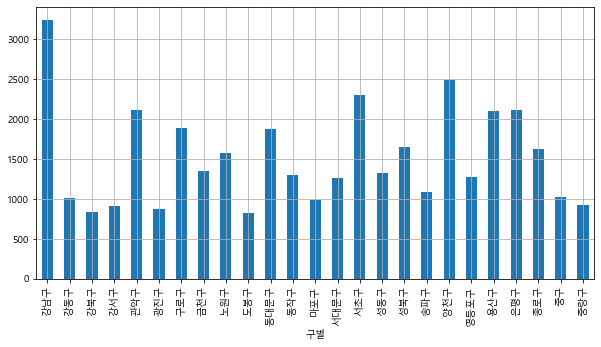

In [128]:
## cctv가 많이 설치된 구별로 그래프 그리기

data_result['소계'].plot(kind='bar')
data_result['소계'].plot.bar()
data_result['소계'].plot(kind='bar',figsize=(10,5),grid=True)    #grid =눈금, figsize=그래프크기?

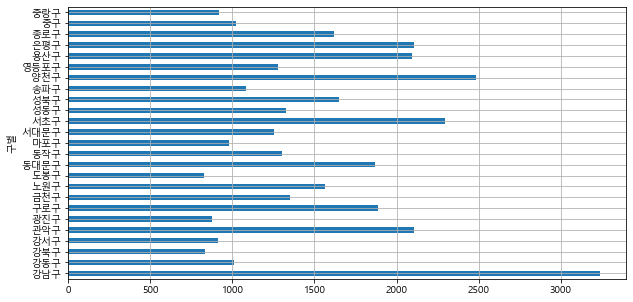

In [131]:
data_result['소계'].plot(kind='barh',figsize=(10,5),grid=True)       #barh 막대그래프가 가로방향이 된다.

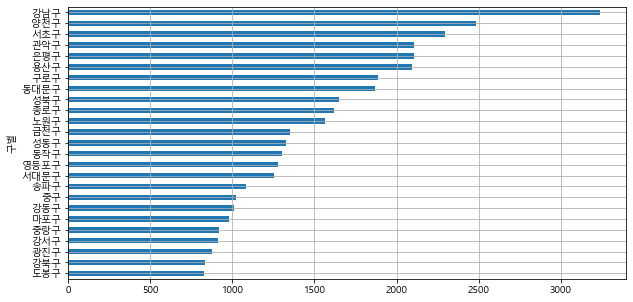

In [130]:
data_result['소계'].sort_values().plot(kind='barh',figsize=(10,5),grid=True)      #순서대로 정렬

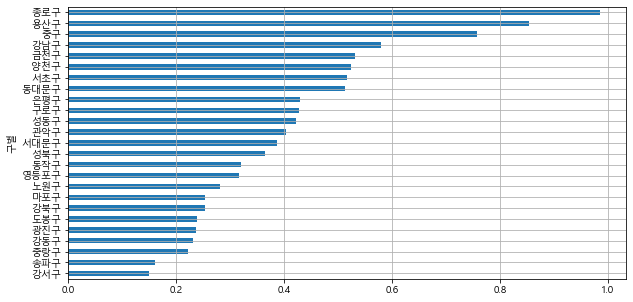

In [132]:
## cctv비율을 그래프로 확인
data_result['CCTV비율'].sort_values().plot(kind='barh',figsize=(10,5),grid=True) 

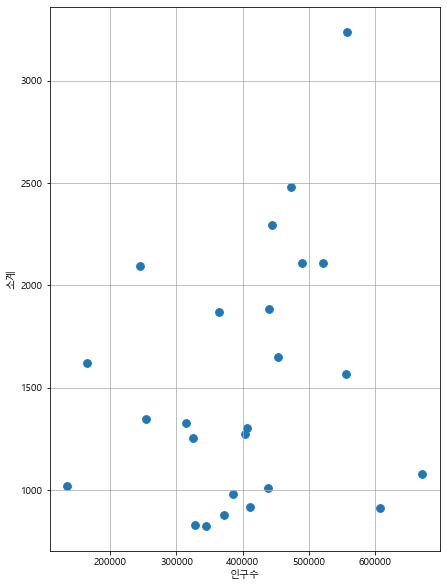

In [140]:
## cctv설치 대수와 인구수의 관계를 그래프로 확인. 상관관계를 그래프로 확인한다.

plt.figure(figsize=(7,10))
plt.scatter(data_result['인구수'],data_result['소계'],s=60)    #plt.scatter(x축,y축)    #  s= 점의 크기
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()

In [145]:
## poly1d()     방정식을 만들어주는 함수
a=np.poly1d([4,3])                   # poly1d([기울기,절편])
print(a)

b=np.poly1d([2,3,4 ])               # poly1d([이차,일차,상수]) 
print(b)

 
4 x + 3
   2
2 x + 3 x + 4


In [151]:
## polyfit()     회귀선 작성 

fp1=np.polyfit(data_result['인구수'],data_result['소계'],1)
print(fp1)


f1=np.poly1d(fp1)
print(f1)       # 이 공식을 받아서 그래프가 선을 그려준다.

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


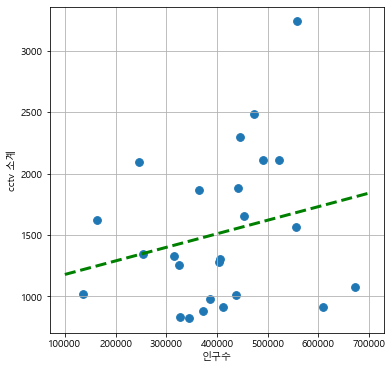

In [177]:
fx=np.linspace(100000,700000,100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=60)    


#plt.plot(data_result['인구수'],f1(data_result['인구수']),lw=3,color='g',ls='dashed')
plt.plot(fx,f1(fx),lw=3,color='g',ls='dashed')             

plt.xlabel('인구수')
plt.ylabel('cctv 소계')
plt.grid()

In [165]:
## 각 데이터의 오차를 구한다.   '오차'컬럼 추가
data_result['오차']= np.abs(data_result['소계']-f1(data_result['인구수']))
data_result.head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475,542.582309
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732,599.318223
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,0.403797,463.580517


In [166]:
df_sort=data_result.sort_values(by='오차',ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973,0.160865,729.738939
도봉구,825,246.638655,345041,342861,2180,54293,0.631809,15.735231,0.239102,624.677016
중랑구,916,79.960707,411552,406868,4684,59992,1.138131,14.577016,0.222572,607.126685
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230,601.085154


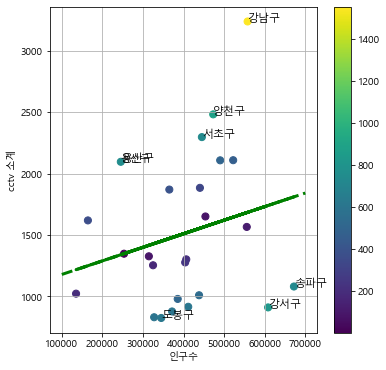

In [178]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50,c=data_result['오차'])    


plt.plot(data_result['인구수'],f1(data_result['인구수']),lw=3,color='g',ls='dashed')
plt.plot(fx,f1(fx),lw=3,color='g',ls='dashed')

plt.xlabel('인구수')
plt.ylabel('cctv 소계')
plt.grid()
plt.colorbar()

plt.text(df_sort['인구수'][3],df_sort['소계'][3],'용산구')



for i in range(7):
    plt.text(df_sort['인구수'][i],df_sort['소계'][i],df_sort.index[i],
            fontsize=11)

In [180]:
## 최종결과물 파일로 저장
df_sort.to_csv('data/seoul/cctv_result_utf.csv',encoding='utf-8')
df_sort.to_csv('data/seoul/cctv_result_euc.csv',encoding='euc-kr')